In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, GroupKFold, GridSearchCV, StratifiedKFold

In [27]:
train = pd.read_csv(r'C:\Users\BIS_COM\data\train\HR\aug_train.csv')
test = pd.read_csv(r'C:\Users\BIS_COM\data\train\HR\aug_test.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [29]:
train.describe(include='O')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [30]:
obj = [ x for x in train.columns if train[x].dtypes == 'O']
num = [ x for x in train.columns if train[x].dtypes in ['int64','float64']]
print('obj_columns : {}, \n num_columns : {}'.format(obj, num))

obj_columns : ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job'], 
 num_columns : ['enrollee_id', 'city_development_index', 'training_hours', 'target']


In [31]:
del train['enrollee_id']
del test['enrollee_id']
# New one
target = train.pop('target')

print(train.shape, test.shape)

(19158, 12) (2129, 12)


In [32]:
target

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

In [34]:
for x in obj:
    le=LabelEncoder()
    le.fit(list(train[x].astype('str')) + list(test[x].astype('str')))
    train[x] = le.transform(list(train[x].astype(str))) 
    test[x] = le.transform(list(test[x].astype(str))) 
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5,0.920,1,0,3,0,5,21,8,6,0,36
1,77,0.776,1,1,3,0,5,6,4,5,4,47
2,64,0.624,3,1,0,0,5,15,8,6,6,83
3,14,0.789,3,1,2,0,1,20,8,5,6,52
4,50,0.767,1,0,3,2,5,21,4,1,3,8


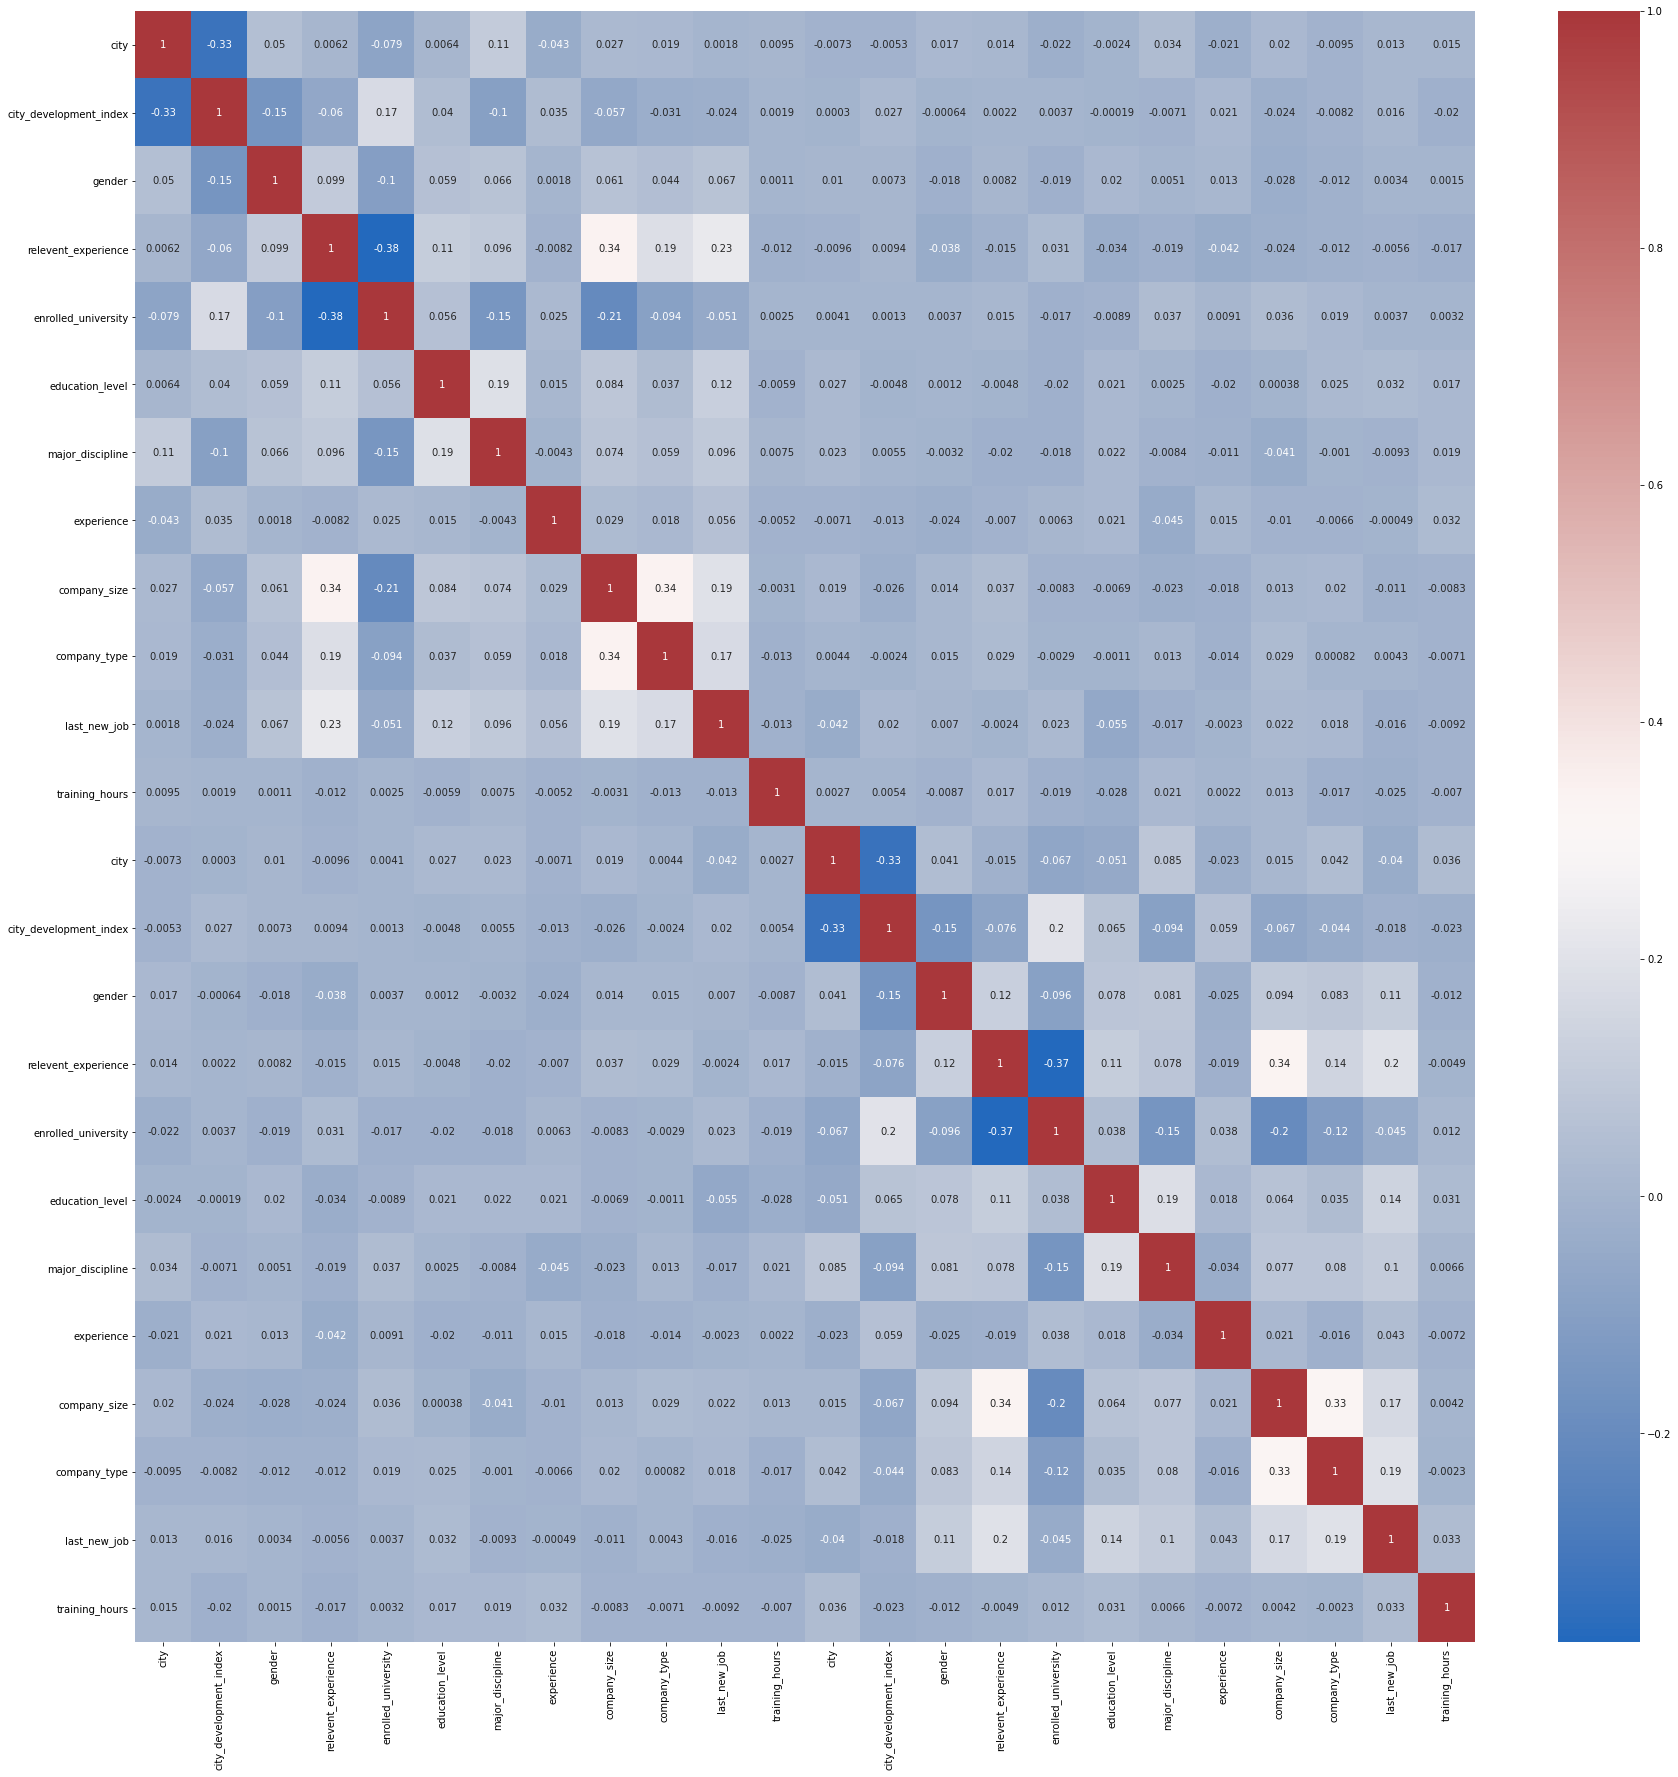

In [36]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.concat([train,test], axis=1).corr(), annot=True, cmap='vlag')